In [29]:
%matplotlib inline


# HOW TO USE!
# This code is designed to crop faces out of the dataset.
#  1.) Create a folder to save your images. In this case we first create a crop folder in a given directory.
#  2.) Ensure that the crop folder has folders inside with the same name as your data folder
#  3.) change the corresponding emotion names (assuming each emotions )
# 
# * This code is made to detect and crop out faces for the given emotion dataset.
#   We isolate faces to reduce image size as well as remove the background completely.
#   This pre-processing in-theory should aid during the machine learning training by reducing
#   feature size of the image and improve saliency detection. Do cite if this technique is used in previous
#   papers. If not then congrats, it's a new method hahahah. 
#


import dlib
import Image
import cv2
from matplotlib import pyplot as plt
import os


data_folder = 'data/'
crop_folder = 'crop/'
emotion     = 'surprise'


def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

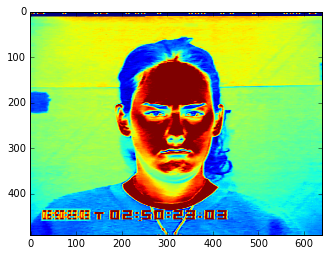

In [32]:
image = cv2.imread('test.png',0)
plt.imshow(image)

In [26]:
directory = os.listdir(data_folder+emotion)

In [ ]:

for filename in directory:
    

    # Load image
    img_path = data_folder + emotion + "/" + filename
    image = cv2.imread(img_path)


    # Detect faces
    detected_faces = detect_faces(image)


    x_start = detected_faces[0][1]
    x_end   = detected_faces[0][3]
    y_start = detected_faces[0][0]
    y_end   = detected_faces[0][2]

    face = image[x_start:x_end,y_start:y_end]
    face = cv2.resize(face,(180,180))


    # save to a designated folder
    cv2.imwrite(crop_folder + emotion + "/" + filename, face)


In [ ]:
print "done"